**Pulang Pegi** <br>
- Anan Agrani <br>
- Augita Dewabrata <br>
- Aulia Gita Pratiwi <br>
- Dhyana Rara Ayu Gandini <br>
- Fitrah Alamsyah <br>
- Khalid Atthariq Wiraguna Aseran <br>

# Problem Statement
In recent years there has been a rapid increase in hotel cancellations. More and more frequently, guests tend to cancel their room reservation. In many cases the cancellation is free of charge up to 24 hours before arrival.

Cancellations often present a big challenge for hotel managers. Especially since the rise of online travel agents such as Booking.com, Expedia and Co. it became more and more common to enforce free cancellations up to 24 hours before arrival. On one hand, this policy brings a new dimension of flexibility to hotel guests, on the other hand, it means an increasing financial risk for hotels and difficulties while planning their occupancy rate. Due to these developments, it got more and more important to analyse cancellation behaviour of hotel guests and find a pattern in order to create a forecast.

Cancellations, especially last minute ones, are the bane of the hospitality industry as a whole. In this study we are taking a deep dive into what cancellations mean for a hotel and how understanding where they come from is the key to mitigating their impact.

In this study, the given dataset is a supervised classification dataset. It holds booking information where the label is binary variable, 0 (city hotel) and 1 (resort hotel). Our target variable Y is the probability of customers that cancel the booking.

This project would fall under what is commonly known as **"Hotel Booking Cancellation Analysis"**

# Import Libraries

In [ ]:
# importing data wrangling libraries
import pandas as pd
import numpy as np

In [ ]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
from matplotlib import rcParams
from scipy import stats

#visualisation settings
rcParams['figure.figsize'] = 20, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
# importing libraries for data modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import xgboost as xgb
from collections import Counter
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import boxcox 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
df_sumber = pd.read_csv ('hotel_booking1.csv')
pd.set_option('display.max_columns', None) #show all column
df_sumber.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
19442,Resort Hotel,0,16,2015,December,51,19,0,1,2,1.0,1,BB,ESP,Online TA,TA/TO,0,0,0,C,G,0,No Deposit,240.0,NaN,0,Transient,69.0,1,3,Check-Out,2015-12-20,Robin Butler,Robin_Butler88@comcast.net,254-638-5437,************9202
122,Resort Hotel,1,36,2015,July,27,4,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,G,1,No Deposit,250.0,NaN,0,Transient,123.0,0,0,No-Show,2015-07-04,Linda Anderson,LindaAnderson@att.com,161-412-7478,************7036


In [ ]:
df = df_sumber

In [ ]:
df.shape

(119390, 36)

# EDA Analysis

## Summary Statistics

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status',
        'name','email','phone-number','credit_card']
boolean = ['is_canceled','is_repeated_guest']
nums = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','babies','agent','days_in_waiting_list','adr',
        'total_of_special_requests','previous_cancellations', 'previous_bookings_not_canceled','booking_changes','required_car_parking_spaces','company']
timestamp = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month','reservation_status_date']

In [ ]:
#summary statistics dari jenis data numerical
df_sumber[nums].describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,agent,days_in_waiting_list,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,company
count,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,6797.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,86.693382,2.321149,101.831122,0.571363,0.087118,0.137097,0.221124,0.062518,189.266735
std,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,110.774548,17.594721,50.535790,0.792798,0.844336,1.497437,0.652306,0.245291,131.655015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,229.000000,0.000000,126.000000,1.000000,0.000000,0.000000,0.000000,0.000000,270.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,535.000000,391.000000,5400.000000,5.000000,26.000000,72.000000,21.000000,8.000000,543.000000


In [ ]:
#summary statistics dari jenis data numerical
df_sumber[cats].describe()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [ ]:
#summary statistics dari jenis data boolean
df_sumber[boolean].describe()

,is_canceled,is_repeated_guest
count,119390.000000,119390.000000
mean,0.370416,0.031912
std,0.482918,0.175767
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
#summary statistics dari jenis data timestamp
df_sumber[timestamp].describe()

,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month
count,119390.000000,119390.000000,119390.000000
mean,2016.156554,27.165173,15.798241
std,0.707476,13.605138,8.780829
min,2015.000000,1.000000,1.000000
25%,2016.000000,16.000000,8.000000
50%,2016.000000,28.000000,16.000000
75%,2017.000000,38.000000,23.000000
max,2017.000000,53.000000,31.000000


Yang aneh dari kedua summary statistics diatas adalah : <br>
1. Nilai minimal `adult` 0, tidak mungkin babies/children check in sendiri tanpa adanya orang yang lebih dewasa
2. Nilai minimal `adr` negatif <br>

In [ ]:
#drop adults=0
df = df[~(df['adults']==0)]

#drop adr (-)
df = df[~(df['adr']<0)]

## Univariate Analysis

### Distribution Plot

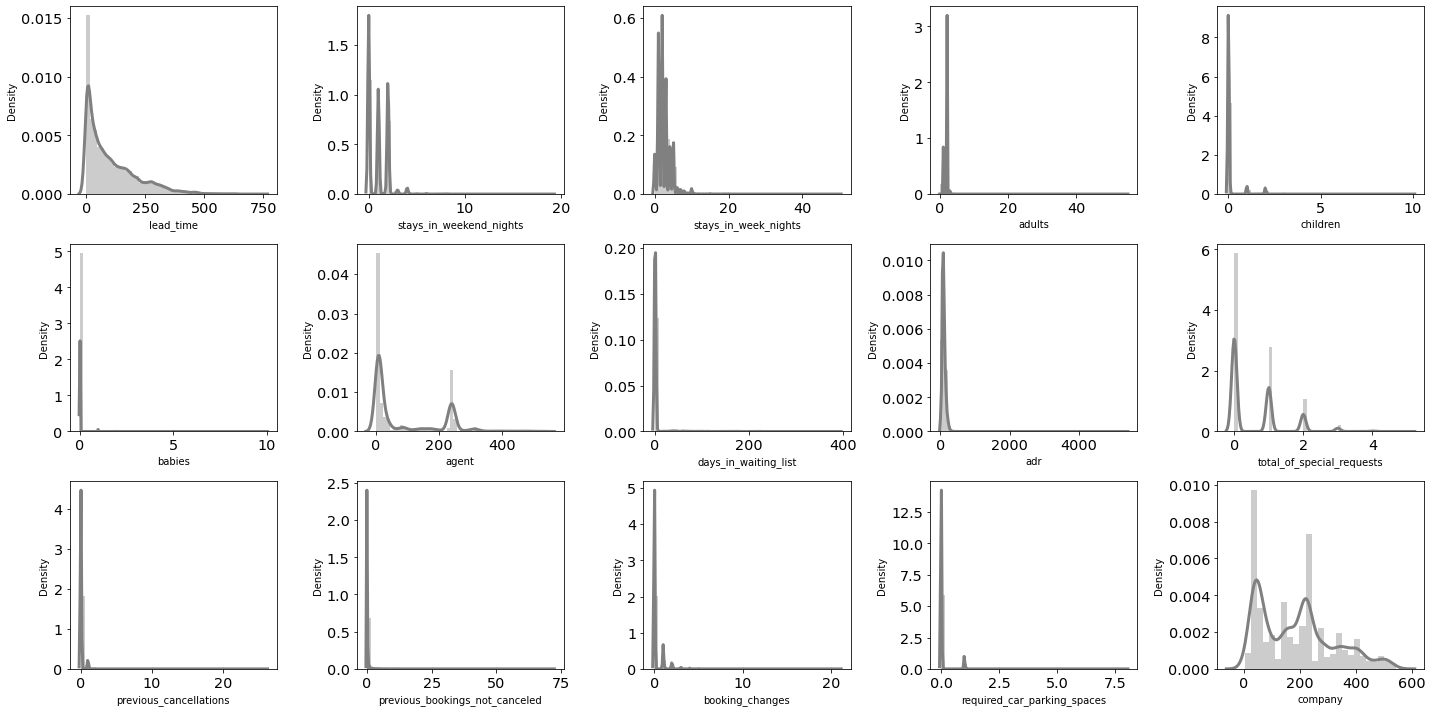

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)   # (baris, kolom, posisi)
    sns.distplot(df_sumber[nums[i]], color='gray')
    plt.tight_layout()

### Violin Plot

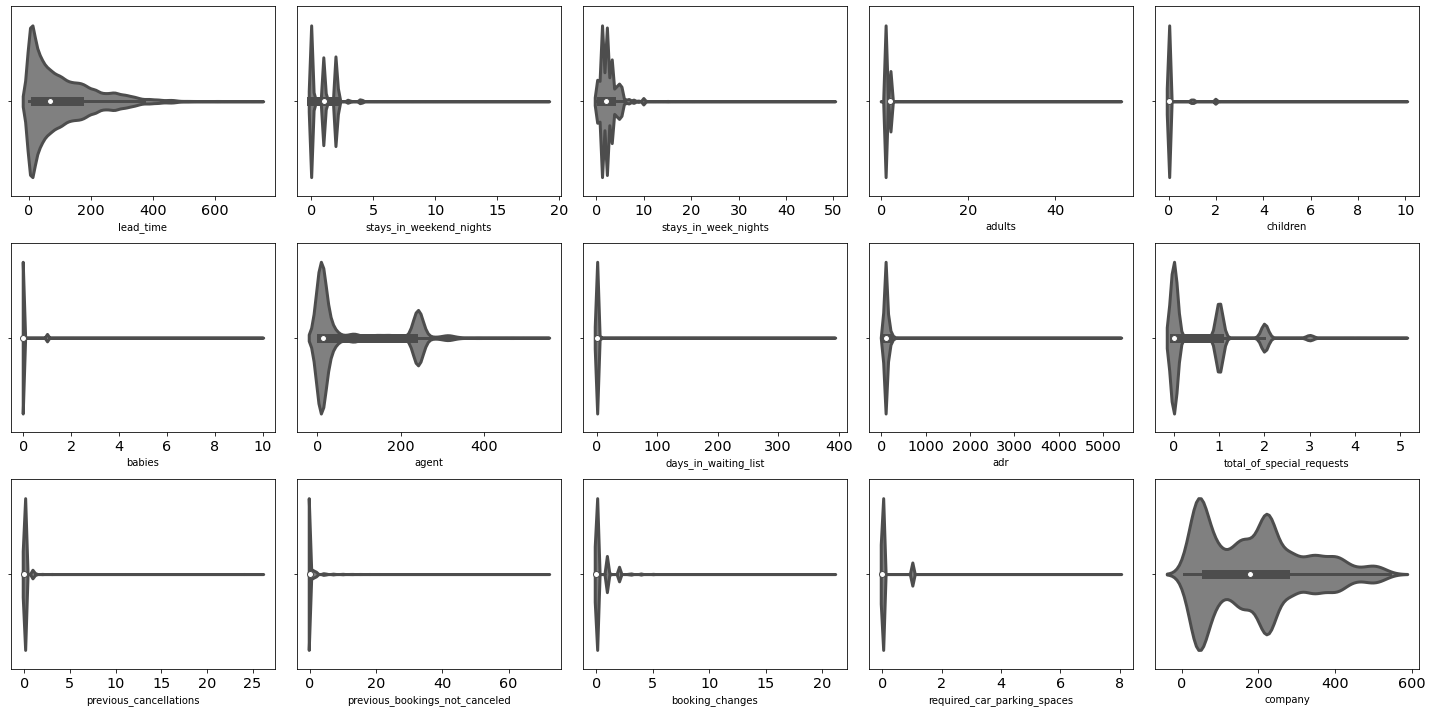

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)   # (baris, kolom, posisi)
    sns.violinplot(df_sumber[nums[i]], color='gray')
    plt.tight_layout()

## Multivariate Analysis

### Correlation

In [ ]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292990,0.016458,0.008315,-0.005886,-0.001368,0.025360,0.058893,0.004847,-0.032621,-0.083772,0.110221,-0.057406,-0.144850,-0.083500,-0.023174,0.054356,0.046447,-0.195866,-0.235268
lead_time,0.292990,1.000000,0.039692,0.127189,0.002046,0.086057,0.166808,0.120019,-0.040491,-0.020799,-0.123270,0.086138,-0.073629,0.002165,-0.069920,0.152426,0.170195,-0.065232,-0.116582,-0.096617
arrival_date_year,0.016458,0.039692,1.000000,-0.540528,0.000003,0.021638,0.031076,0.031091,0.055300,-0.012903,0.010205,-0.119942,0.029247,0.031411,0.063593,0.257840,-0.056359,0.198474,-0.013813,0.108465
arrival_date_week_number,0.008315,0.127189,-0.540528,1.000000,0.066238,0.018739,0.016107,0.026679,0.005828,0.010161,-0.031035,0.035518,-0.021015,0.006235,-0.031284,-0.076303,0.022694,0.076235,0.002057,0.025974
arrival_date_day_of_month,-0.005886,0.002046,0.000003,0.066238,1.000000,-0.016314,-0.028465,-0.001046,0.013688,-0.000106,-0.006410,-0.027055,-0.000276,0.011225,0.001567,0.044300,0.022581,0.030423,0.008647,0.002736
stays_in_weekend_nights,-0.001368,0.086057,0.021638,0.018739,-0.016314,1.000000,0.494533,0.096112,0.046814,0.018811,-0.086185,-0.012777,-0.042912,0.050225,0.141575,0.068697,-0.054428,0.050794,-0.018510,0.073041
stays_in_week_nights,0.025360,0.166808,0.031076,0.016107,-0.028465,0.494533,1.000000,0.097481,0.045371,0.020397,-0.095421,-0.013991,-0.048910,0.079961,0.183622,0.191005,-0.002014,0.067006,-0.024893,0.068801
adults,0.058893,0.120019,0.031091,0.026679,-0.001046,0.096112,0.097481,1.000000,0.060641,0.018437,-0.143373,-0.007707,-0.110483,-0.040572,-0.043491,0.214591,-0.009255,0.224111,0.013248,0.128326
children,0.004847,-0.040491,0.055300,0.005828,0.013688,0.046814,0.045371,0.060641,1.000000,0.024082,-0.031785,-0.024467,-0.020742,0.049710,0.048455,0.036060,-0.032840,0.336783,0.059580,0.078282
babies,-0.032621,-0.020799,-0.012903,0.010161,-0.000106,0.018811,0.020397,0.018437,0.024082,1.000000,-0.008800,-0.007506,-0.006550,0.085577,0.036343,0.019312,-0.010627,0.029090,0.037478,0.097949


<function matplotlib.pyplot.show(*args, **kw)>

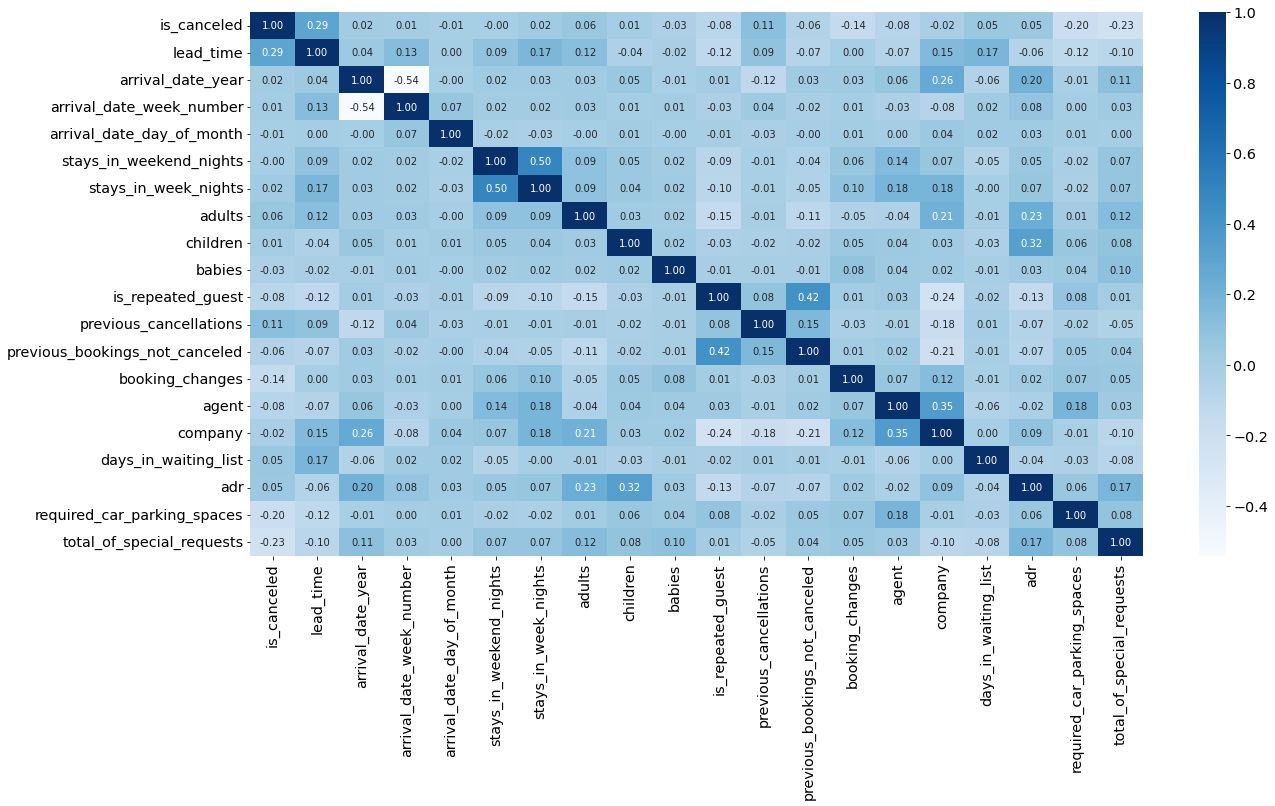

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_sumber.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show

# Data PreProcessing

## Missing Value

In [ ]:
# Percentage dari missing Value

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 ' total_missing' : df.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

,column_name,total_missing,percent_missing
hotel,hotel,0,0.000
is_canceled,is_canceled,0,0.000
lead_time,lead_time,0,0.000
arrival_date_year,arrival_date_year,0,0.000
arrival_date_month,arrival_date_month,0,0.000
arrival_date_week_number,arrival_date_week_number,0,0.000
arrival_date_day_of_month,arrival_date_day_of_month,0,0.000
stays_in_weekend_nights,stays_in_weekend_nights,0,0.000
stays_in_week_nights,stays_in_week_nights,0,0.000
adults,adults,0,0.000


Jadi ada 4 kolom yang memiliki missing value atau nilai kosong yaitu :<br>
1. `Children` : 4 baris atau 0.003%
2. `Country` : 478 baris atau  0.409%
3. `Agent` : 16.340 baris atau  13.686 %
4. `Company` : 112.593 baris atau 94.307%

In [ ]:
df.shape

(118986, 36)

### Fill Missing Value

In [ ]:
# children and country fill with mode
df['children'].fillna(df['children'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

# drop agent and company
df = df.drop(columns=['agent','company'])

### Check Missing Value Again

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 ' total_missing' : df.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

,column_name,total_missing,percent_missing
hotel,hotel,0,0.0
is_canceled,is_canceled,0,0.0
lead_time,lead_time,0,0.0
arrival_date_year,arrival_date_year,0,0.0
arrival_date_month,arrival_date_month,0,0.0
arrival_date_week_number,arrival_date_week_number,0,0.0
arrival_date_day_of_month,arrival_date_day_of_month,0,0.0
stays_in_weekend_nights,stays_in_weekend_nights,0,0.0
stays_in_week_nights,stays_in_week_nights,0,0.0
adults,adults,0,0.0


Missing value already filled

## Duplicated Data

In [ ]:
df_sumber.duplicated().sum()

0

## Outlier

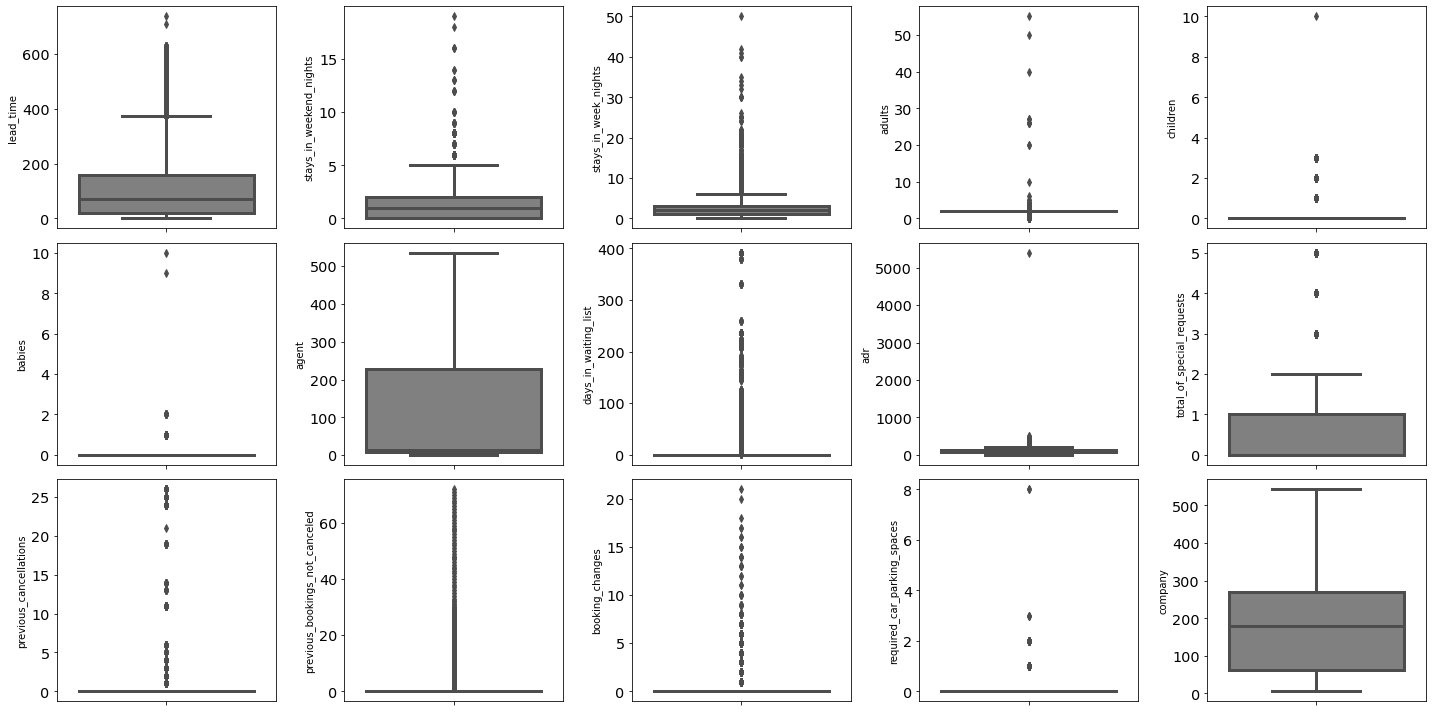

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df_sumber[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['required_car_parking_spaces']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 118986
Jumlah baris setelah memfilter outlier: 111579


## Class Imbalance

In [ ]:
class_imbalance_percentage = df['is_canceled'].value_counts()* 100 / len(df)
class_imbalance = pd.DataFrame({' total_row' : df['is_canceled'].value_counts(),
                                 'percentage': round(class_imbalance_percentage,3)})
class_imbalance

,total_row,percentage
0,67464,60.463
1,44115,39.537


Because the percentage of minority class (1) is 39.537%, the target column, 'is cancelled,' belongs to the mild balance class

In [ ]:
df.shape

(111579, 34)

# Insight

## Total Cancel Each Year

In [ ]:
year_count = df.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
year_perct.columns = ['arrival_date_year', 'is_canceled', 'percent']
year_count

count
arrival_date_year is_canceled       
2015              0            12468
                  1             8136
2016              0            32344
                  1            20276
2017              0            22652
                  1            15703

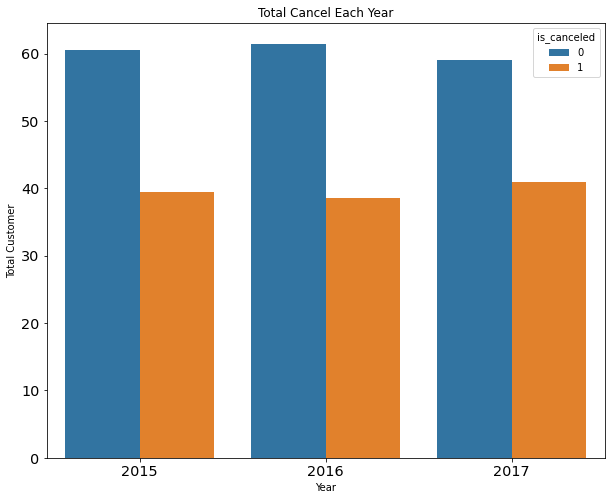

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=year_perct, x='arrival_date_year', y='percent', hue='is_canceled')
plt.xticks()
plt.title("Total Cancel Each Year", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Customer', fontsize=10)
plt.show()

The highest cancelation rate occurred in 2017, which was 40.94%

## Cancellation Rate by Month

In [ ]:
month_count = df.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='count')
month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
month_perct.columns = ['month','cancel', 'percent']
month_perct

,month,cancel,percent
0,April,0,56.751055
1,April,1,43.248945
2,August,0,59.276864
3,August,1,40.723136
4,December,0,62.177329
5,December,1,37.822671
6,February,0,64.297103
7,February,1,35.702897
8,January,0,66.740495
9,January,1,33.259505


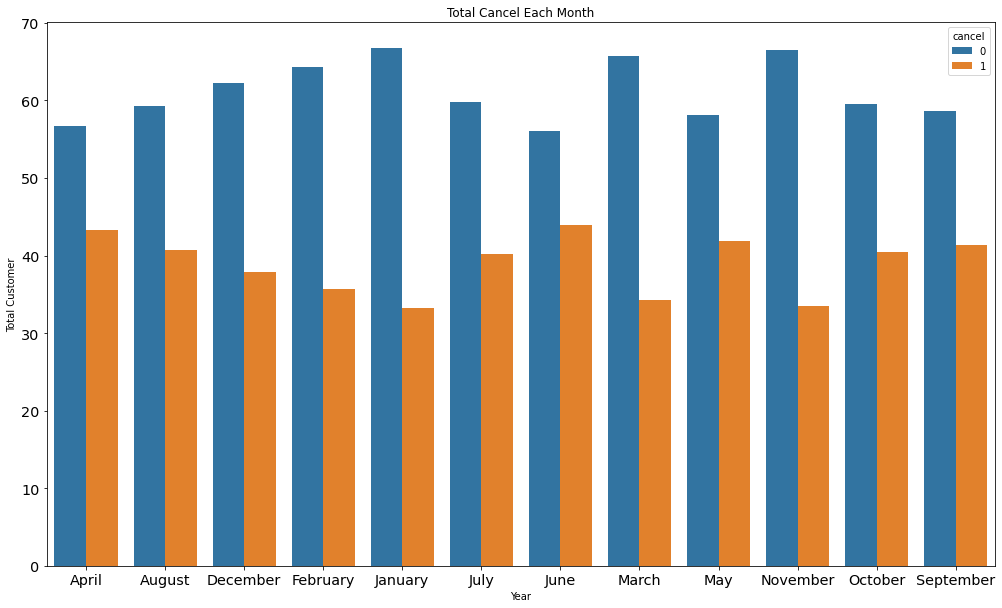

In [ ]:
plt.figure(figsize=(17,10))
sns.barplot(data=month_perct, x='month', y='percent', hue='cancel')
plt.xticks()
plt.title("Total Cancel Each Month", fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Customer', fontsize=10)
plt.show()

The lowest cancelation rate is from November to March (Autumn - Winter) and the highest is on April to October (Spring - Summer)

## The Most Used Deposit Type

In [ ]:
dfg7 = df.groupby(['deposit_type']).agg({'name': ['count']}).reset_index()
dfg7.columns = ['deposit_type','TotalCustomer']
dfg7['percent'] = dfg7['TotalCustomer']/111579*100
dfg7

,deposit_type,TotalCustomer,percent
0,No Deposit,96849,86.798591
1,Non Refund,14586,13.072352
2,Refundable,144,0.129057


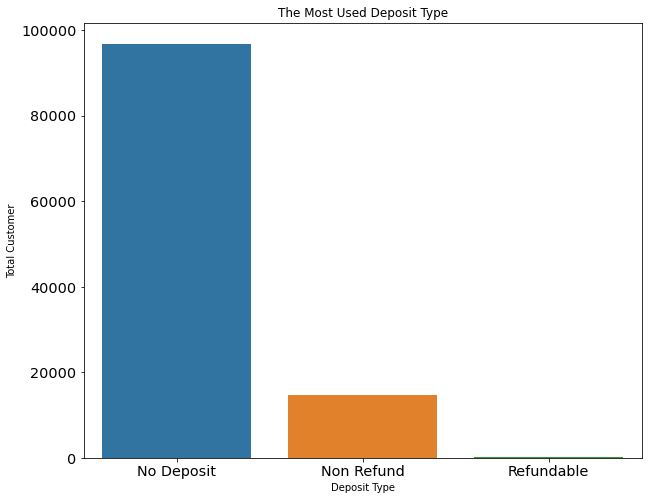

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfg7, x='deposit_type', y='TotalCustomer')
plt.xticks()
plt.title("The Most Used Deposit Type", fontsize=12)
plt.xlabel('Deposit Type', fontsize=10)
plt.ylabel('Total Customer', fontsize=10)
plt.show()

## Customer's Deposit Type who Cancel

In [ ]:
dfg3 = df.groupby(['deposit_type', 'is_canceled']).agg({'name': ['count']}).reset_index()
dfg3.columns = ['deposit_type', 'cancel', 'TotalCustomer']
dfg3 = dfg3[dfg3['cancel']==1]
dfg3

,deposit_type,cancel,TotalCustomer
1,No Deposit,1,29585
3,Non Refund,1,14494
5,Refundable,1,36


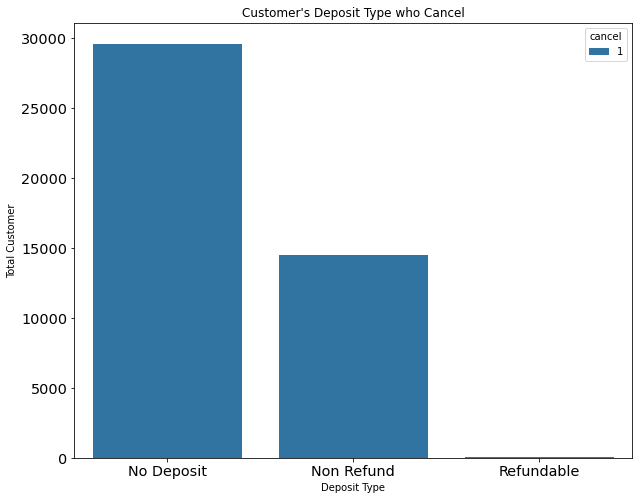

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfg3, x='deposit_type', y='TotalCustomer', hue='cancel')
plt.xticks()
plt.title("Customer's Deposit Type who Cancel", fontsize=12)
plt.xlabel('Deposit Type', fontsize=10)
plt.ylabel('Total Customer', fontsize=10)
plt.show()

Customers with No Deposit types have the biggest cancellation rate compared to other types of deposit type

## The Most Canceled Room Type

In [ ]:
# Cancel booking room type

dfg4 = df.groupby(['reserved_room_type', 'is_canceled']).size().to_frame(name='count')
dfg4_percent = dfg4.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
dfg4_percent.columns = ['room_type', 'cancel','percent']
dfg4_percent

,room_type,cancel,percent
0,A,0,58.959086
1,A,1,41.040914
2,B,0,66.975666
3,B,1,33.024334
4,C,0,59.096946
5,C,1,40.903054
6,D,0,65.862802
7,D,1,34.137198
8,E,0,65.484805
9,E,1,34.515195


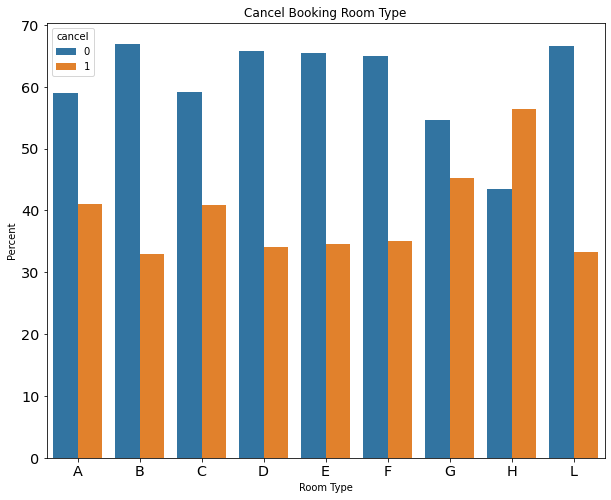

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfg4_percent, x='room_type', y='percent', hue='cancel')
plt.xticks()
plt.title("Cancel Booking Room Type", fontsize=12)
plt.xlabel('Room Type', fontsize=10)
plt.ylabel('Percent', fontsize=10)
plt.show()

Room Type H is the most canceled with 56.45%

## The Most Booking Room Type

In [ ]:
dfg5 = df.groupby(['reserved_room_type']).size().to_frame(name='count').reset_index()
dfg5.columns = ['room_type', 'count']
dfg5['percent'] = dfg5['count']/111579*100
dfg5

,room_type,count,percent
0,A,81928,73.426003
1,B,863,0.773443
2,C,753,0.674858
3,D,17872,16.017351
4,E,5528,4.954337
5,F,2513,2.252216
6,G,1682,1.507452
7,H,434,0.388962
8,L,6,0.005377


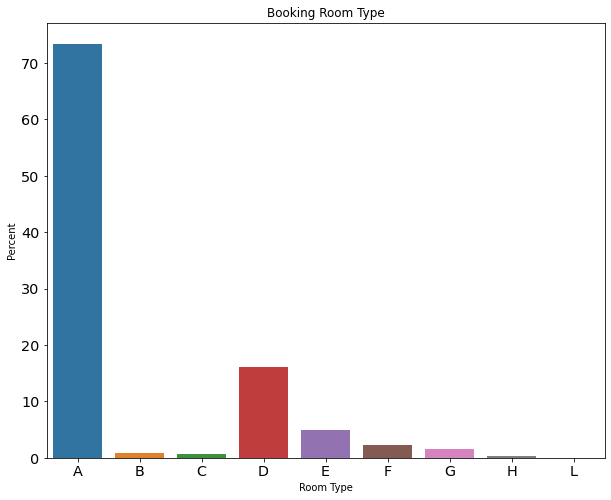

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=dfg5, x='room_type', y='percent')
plt.xticks()
plt.title("Booking Room Type", fontsize=12)
plt.xlabel('Room Type', fontsize=10)
plt.ylabel('Percent', fontsize=10)
plt.show()

Room Type A is the most canceled with 68.62%

## Customer Origin Percentage

In [ ]:
dfg6 = df.groupby(['country']).size().to_frame(name='count').reset_index()
dfg6.columns = ['country', 'count']
dfg6['percent'] = dfg6['count']/111579*100
dfg6.sort_values(by=['count'],ascending=False).head(5)

,country,count,percent
134,PRT,45729,40.983518
59,GBR,11548,10.349618
56,FRA,9801,8.783911
51,ESP,7355,6.591742
43,DEU,7029,6.299573


## Customer Origin

In [ ]:
!pip install requests folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Search most guest coming from
guest_city = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

import folium
from folium.plugins import HeatMap
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

The highest Total Visitor comes from Portugal, with 48.590 Visitor

# New Feature (Feature Extraction)

In [ ]:
# fitur country_type

country_type = []

for index, kolom in df.iterrows():
    country = kolom['country']

    if country == 'PRT':
        result = 'local'
    else:
        result = 'international'
        
    country_type.append(result)
    
df['country_type'] = country_type

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international


In [ ]:
#fitur total_guest

total_guest = (df['adults']+df['babies']+df['children'])
    
df['total_guest'] = total_guest

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0


In [ ]:
# fitur total stay

total_stay = (df['stays_in_weekend_nights']+df['stays_in_week_nights'])
    
df['total_stay'] = total_stay

pd.set_option('display.max_columns', None)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest,total_stay
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0,3
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0,4
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0,4
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0,4
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0,4


In [ ]:
#fitur musim_reservation

#seperate year, month and day from reservation_status_date
df[['rsv_Year', 'rsv_Month','rsv_Day']] = df['reservation_status_date'].str.split('-', 3, expand=True)

condlist = [df['rsv_Month'].str.contains('03|04|05'), df['rsv_Month'].str.contains('06|07|08'),
           df['rsv_Month'].str.contains('09|10|11'),df['rsv_Month'].str.contains('12|01|02')]
condcat = ['Spring','Summer','Autumn','Winter']
df['musim_reservation'] = np.select(condlist,condcat)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest,total_stay,rsv_Year,rsv_Month,rsv_Day,musim_reservation
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0,2,2015,07,03,Summer
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0,3,2015,05,06,Spring
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0,3,2015,04,22,Spring
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0,4,2015,06,23,Summer
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0,4,2015,07,05,Summer
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0,4,2015,07,05,Summer
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0,4,2015,07,05,Summer


In [ ]:
#fitur musim_arrival

condlist = [df['arrival_date_month'].str.contains('March|April|May'), df['arrival_date_month'].str.contains('June|July|August'),
           df['arrival_date_month'].str.contains('September|October|November'),df['arrival_date_month'].str.contains('December|January|February')]
condcat = ['Spring','Summer','Autumn','Winter']
df['musim_arrival'] = np.select(condlist,condcat)
df[7: 14]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_type,total_guest,total_stay,rsv_Year,rsv_Month,rsv_Day,musim_reservation,musim_arrival
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,local,2.0,2,2015,07,03,Summer,Summer
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,local,2.0,3,2015,05,06,Spring,Summer
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,local,2.0,3,2015,04,22,Spring,Summer
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,123.00,0,0,Canceled,2015-06-23,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,************4642,local,2.0,4,2015,06,23,Summer,Summer
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,145.00,0,0,Check-Out,2015-07-05,Laurie Smith,Smith.Laurie@att.com,804-383-4080,************5450,local,2.0,4,2015,07,05,Summer,Summer
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,0,Transient,97.00,0,3,Check-Out,2015-07-05,Casey Thomas,Casey_T78@outlook.com,211-071-2173,************8518,international,2.0,4,2015,07,05,Summer,Summer
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,1.0,0,HB,ESP,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,0,Transient,154.77,0,1,Check-Out,2015-07-05,Rachel Friedman,Rachel.F@protonmail.com,435-075-8409,************9767,international,3.0,4,2015,07,05,Summer,Summer


# Feature Encoding

In [ ]:
for cat in ['hotel', 'meal','deposit_type','customer_type','market_segment','distribution_channel', 
            'country_type','arrival_date_year','reserved_room_type','musim_arrival','musim_reservation','rsv_Year']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111579 entries, 0 to 119389
Data columns (total 95 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           111579 non-null  object 
 1   is_canceled                     111579 non-null  int64  
 2   lead_time                       111579 non-null  int64  
 3   arrival_date_year               111579 non-null  int64  
 4   arrival_date_month              111579 non-null  object 
 5   arrival_date_week_number        111579 non-null  int64  
 6   arrival_date_day_of_month       111579 non-null  int64  
 7   stays_in_weekend_nights         111579 non-null  int64  
 8   stays_in_week_nights            111579 non-null  int64  
 9   adults                          111579 non-null  int64  
 10  children                        111579 non-null  float64
 11  babies                          111579 non-null  int64  
 12  meal            

# Drop Columns

In [ ]:
df = df.drop(columns=['name', 'email', 'phone-number','credit_card', #too many unique value
                      'hotel','meal','deposit_type','customer_type','market_segment','distribution_channel','country_type','arrival_date_year','reserved_room_type', 
                      'musim_arrival', 'rsv_Year','musim_reservation', #the original column from encoding feature
                      'adults','babies','children','country','stays_in_weekend_nights', 'stays_in_week_nights','arrival_date_month','rsv_Month','reservation_status_date',
                      'arrival_date_day_of_month', #the original column from new feature
                      'reservation_status', #has the same information as the is_cancelled column 
                     ])
df.sample(5)

,is_canceled,lead_time,arrival_date_week_number,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,total_stay,rsv_Day,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_type_international,country_type_local,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,musim_arrival_Autumn,musim_arrival_Spring,musim_arrival_Summer,musim_arrival_Winter,musim_reservation_Autumn,musim_reservation_Spring,musim_reservation_Summer,musim_reservation_Winter,rsv_Year_2014,rsv_Year_2015,rsv_Year_2016,rsv_Year_2017
39386,0,78,33,0,0,0,F,0,0,232.00,0,1,2.0,2,17,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
5439,1,108,18,0,0,0,A,0,0,84.00,0,0,2.0,4,12,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
89910,0,1,22,0,0,0,D,0,0,179.00,0,2,3.0,2,29,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
35994,0,221,18,0,0,0,D,0,0,85.43,0,2,2.0,7,07,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
44489,0,34,41,0,0,0,A,0,0,66.53,0,1,2.0,2,08,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


# Remove collinear features

In [ ]:
# Threshold for removing correlated variables
threshold = 0.85

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

to_drop

There are 8 columns to remove :


['hotel_Resort Hotel',
 'deposit_type_Non Refund',
 'customer_type_Transient-Party',
 'distribution_channel_Direct',
 'country_type_local',
 'rsv_Year_2015',
 'rsv_Year_2016',
 'rsv_Year_2017']

In [ ]:
df = df.drop(columns=["hotel_Resort Hotel", "deposit_type_Non Refund", "customer_type_Transient-Party",
                      "distribution_channel_Direct", "country_type_local","rsv_Year_2015",'assigned_room_type', 'arrival_date_week_number','rsv_Day'])

In [ ]:
# Threshold for removing correlated variables
threshold = 0.85

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

to_drop

There are 2 columns to remove :


['rsv_Year_2016', 'rsv_Year_2017']

we didn't drop the `rsv_year_2016` and `rsv_year_2016` because if we did drop the `rsv_year_2016` and `rsv_year_2016`, information about rsv_year will be gone

In [ ]:
df.shape

(111579, 59)

# Pre-Modeling

## Splitting Data

In [ ]:
dataset = df
X = dataset.drop(columns=['is_canceled'])
y = dataset[['is_canceled']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
a = X_train.columns
b = X_test.columns

## Feature Transformation

In [ ]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)

test_sc = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(train_sc, columns = a)
X_test = pd.DataFrame(test_sc, columns = a)

In [ ]:
X_train.shape

(78105, 58)

In [ ]:
y_train.shape

(78105, 1)

In [ ]:
X_test.shape

(33474, 58)

In [ ]:
X_train.head()

,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,total_stay,hotel_City Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_type_international,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,musim_arrival_Autumn,musim_arrival_Spring,musim_arrival_Summer,musim_arrival_Winter,musim_reservation_Autumn,musim_reservation_Spring,musim_reservation_Summer,musim_reservation_Winter,rsv_Year_2014,rsv_Year_2016,rsv_Year_2017
0,0.468651,-0.172659,-0.105684,-0.084757,1.271085,-0.136096,1.028896,0.0,-0.706878,1.424219,-0.176633,0.670088,0.546454,-0.080187,-0.370692,-0.319707,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,0.588701,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,-0.518343,1.062578,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,-0.475520,-0.94479,1.381095,-1.667481,-0.085968,-0.082026,-0.436669,4.389300,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,-0.617961,1.482657,-0.455998,-0.561533,-0.587320,1.643886,-0.552240,-0.041765,-0.963523,1.505758
1,2.378583,-0.172659,1.045882,-0.084757,-0.333072,-0.136096,0.006472,0.0,-0.706878,0.051004,-0.568920,0.670088,-1.829981,-0.080187,2.697655,-0.319707,-0.100566,-2.568899,-0.03508,-0.191034,-0.069922,-1.698657,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,1.929223,-0.941107,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,-1.200389,2.102963,-0.94479,-0.724063,0.599707,-0.085968,-0.082026,-0.436669,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,1.785165,-0.617961,-0.674465,-0.455998,-0.561533,-0.587320,1.643886,-0.552240,-0.041765,-0.963523,-0.664117
2,-0.820089,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,0.024935,0.0,-0.706878,0.051004,0.215654,0.670088,0.546454,-0.080187,-0.370692,-0.319707,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,0.588701,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,-0.518343,1.062578,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,-0.475520,-0.94479,1.381095,-1.667481,-0.085968,-0.082026,2.290066,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,-0.617961,-0.674465,2.192994,-0.561533,-0.587320,-0.608315,1.810807,-0.041765,-0.963523,1.505758
3,-0.078368,-0.172659,-0.105684,-0.084757,2.875241,-0.136096,0.790661,0.0,-0.706878,0.051004,1.000227,0.670088,-1.829981,-0.080187,2.697655,-0.319707,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,-1.698657,-0.044879,-0.076294,-0.209036,-0.322207,2.172818,-0.518343,-0.941107,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,-0.475520,-0.94479,1.381095,0.599707,-0.085968,-0.082026,-0.436669,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,1.618225,-0.674465,-0.455998,-0.561533,1.702648,-0.608315,-0.552240,-0.041765,-0.963523,1.505758
4,-0.087640,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,-0.618894,0.0,-0.706878,-1.322210,-0.176633,0.670088,0.546454,-0.080187,-0.370692,-0.319707,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,-1.698657,-0.044879,-0.076294,-0.209036,-0.322207,2.172818,-0.518343,-0.941107,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,2.102963,-0.94479,-0.724063,0.599707,-0.085968,-0.082026,-0.436669,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,1.785165,-0.617961,-0.674465,-0.455998,1.780838,-0.587320,-0.608315,-0.552240,-0.041765,-0.963523,-0.664117


In [ ]:
X_test.head()

,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest,total_stay,hotel_City Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_No Deposit,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_type_international,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,musim_arrival_Autumn,musim_arrival_Spring,musim_arrival_Summer,musim_arrival_Winter,musim_reservation_Autumn,musim_reservation_Spring,musim_reservation_Summer,musim_reservation_Winter,rsv_Year_2014,rsv_Year_2016,rsv_Year_2017
0,-0.940619,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,-0.132498,0.0,0.568314,0.051004,-0.961207,-1.492340,0.546454,-0.080187,-0.370692,-0.319707,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,0.588701,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,-0.518343,1.062578,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,-1.200389,-0.475520,-0.944790,1.381095,-1.667481,-0.085968,-0.082026,2.290066,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,-0.617961,1.482657,-0.455998,-0.561533,-0.58732,1.643886,-0.55224,-0.041765,-0.963523,1.505758
1,1.340174,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,-0.768188,0.0,0.568314,0.051004,1.392514,-1.492340,0.546454,-0.080187,-0.370692,-0.319707,-0.100566,0.389272,-0.03508,5.234675,-0.069922,-1.698657,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,1.929223,-0.941107,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,2.102963,-0.944790,-0.724063,-1.667481,-0.085968,-0.082026,2.290066,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,1.785165,-0.617961,-0.674465,-0.455998,1.780838,-0.58732,-0.608315,-0.55224,-0.041765,-0.963523,-0.664117
2,-0.996248,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,-0.389593,0.0,-0.706878,0.051004,-0.961207,0.670088,-1.829981,-0.080187,-0.370692,3.127861,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,0.588701,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,-0.518343,1.062578,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,-0.475520,1.058436,-0.724063,0.599707,-0.085968,-0.082026,-0.436669,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,-0.617961,1.482657,-0.455998,-0.561533,-0.58732,1.643886,-0.55224,-0.041765,1.037858,-0.664117
3,-0.681017,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,1.011028,0.0,-0.706878,1.424219,-0.961207,0.670088,0.546454,-0.080187,-0.370692,-0.319707,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,0.588701,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,-0.518343,1.062578,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,-0.475520,1.058436,-0.724063,0.599707,-0.085968,-0.082026,-0.436669,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,-0.617961,1.482657,-0.455998,-0.561533,-0.58732,1.643886,-0.55224,-0.041765,1.037858,-0.664117
4,-0.579030,-0.172659,-0.105684,-0.084757,-0.333072,-0.136096,0.135516,0.0,0.568314,0.051004,-0.568920,0.670088,-1.829981,-0.080187,-0.370692,3.127861,-0.100566,0.389272,-0.03508,-0.191034,-0.069922,0.588701,-0.044879,-0.076294,-0.209036,-0.322207,-0.460232,-0.518343,1.062578,-0.00506,-0.236856,-0.041918,0.44545,-0.006198,0.833063,-0.475520,1.058436,-0.724063,0.599707,-0.085968,-0.082026,-0.436669,-0.227827,-0.150815,-0.122783,-0.062302,-0.007157,-0.560172,-0.617961,1.482657,-0.455998,1.780838,-0.58732,-0.608315,-0.55224,-0.041765,1.037858,-0.664117


In [ ]:
y_train.head()

,is_canceled
114263,0
76067,1
63892,1
110006,0
45749,0


In [ ]:
y_test.head()

,is_canceled
36975,0
16895,0
91211,0
93979,0
96373,0


## Def Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 10 ), )
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Modeling

## Logistic Regression

### Fit Model

In [ ]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.88
Recall (Test Set): 0.68
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8877209004699018
roc_auc (crossval test): 0.7655720723567722


## Decision Tree

### Fit Model

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.84
Recall (Test Set): 0.86
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999389573950885
roc_auc (crossval test): 0.5888532445351329


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [10] # Maximum number of levels in tree
min_samples_split = [138] # Minimum number of samples required to split a node
min_samples_leaf = [125,133] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.78
Recall (Test Set): 0.57
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.84
roc_auc (crossval train): 0.8764011894181604
roc_auc (crossval test): 0.7254396306013977


## Random Forest

### Fit Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.93
Recall (Test Set): 0.85
F1-Score (Test Set): 0.89
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9997104882719237
roc_auc (crossval test): 0.6355307721110789


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [1]
criterion = ['gini','entropy']
max_depth = [9]
min_samples_split = [35]
min_samples_leaf = [17]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='precision', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.77
Recall (Test Set): 0.64
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.85
roc_auc (crossval train): 0.883156795241916
roc_auc (crossval test): 0.7594140966216043


## Adaboost

### Fit Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.84
Recall (Test Set): 0.69
F1-Score (Test Set): 0.76
roc_auc (test-proba): 0.90
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.9125485318941836
roc_auc (crossval test): 0.7866259694016928


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [90,91,92,93], # Jumlah iterasi
                       learning_rate = [0.097,0.098,0.099,0.1],  
                       algorithm = ['SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.89
Recall (Test Set): 0.47
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88


KeyboardInterrupt: ignored

## XGBoost

### Fit Model

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.90
Recall (Test Set): 0.75
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9479872580301297
roc_auc (crossval test): 0.8088663022390252


In [ ]:
y_train_pred = xg.predict(X)
y_test_pred = xg.predict(X)

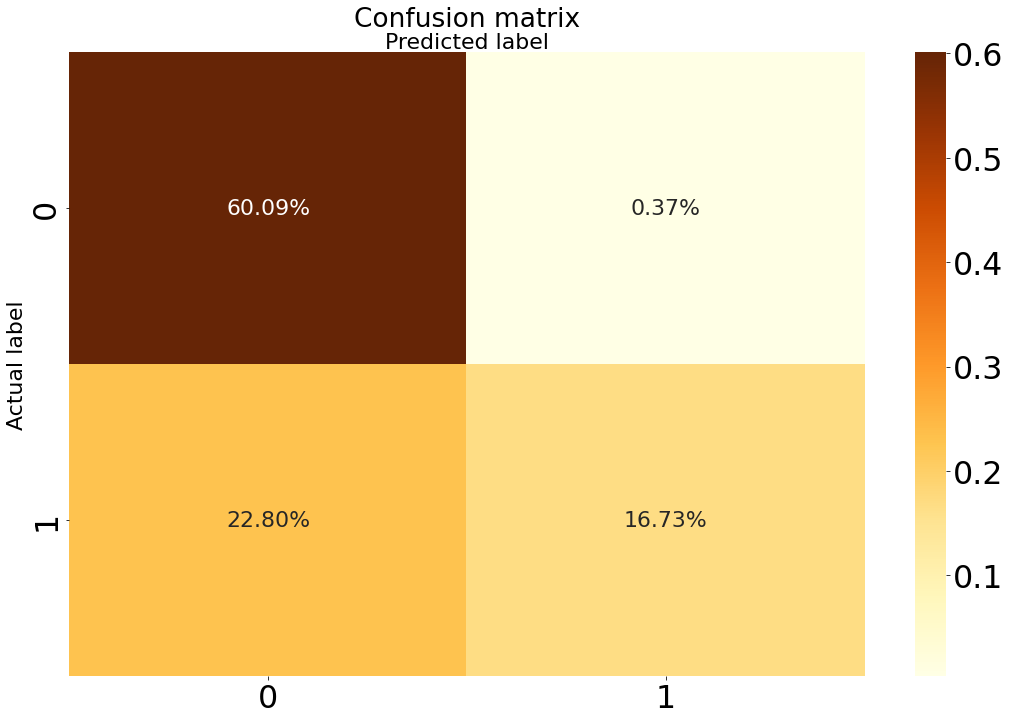

In [ ]:
rcParams['figure.figsize'] = 15, 10
rcParams.update({'font.size': 22})

# Confusion Matrix
ys_pred = xg.predict (X_test)
confusion_matrix = confusion_matrix(y, y_test_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap="YlOrBr")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

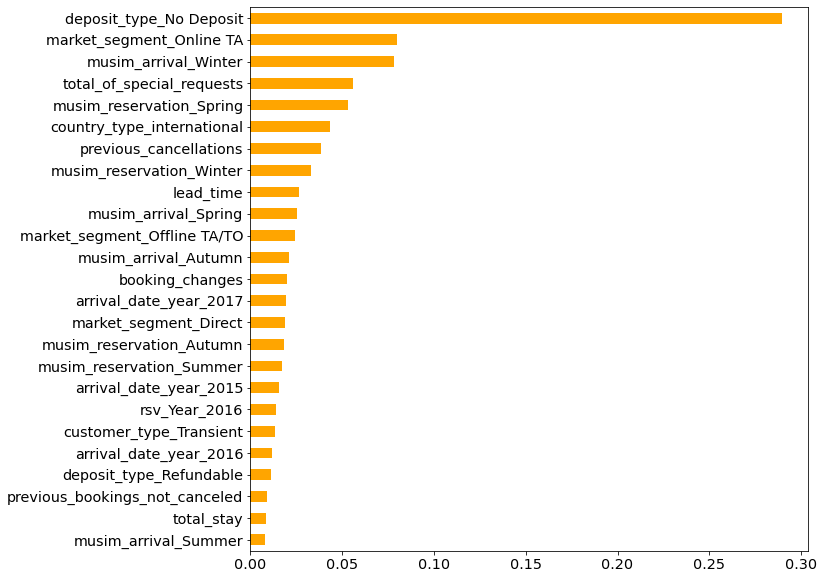

In [ ]:
rcParams.update({'font.size': 10})
feat_importances = pd.Series(xg.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 10 ), color="orange")
ax.invert_yaxis()

# Conclussion

We will use XGBoost Model for this prediction